In [151]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
amazon_df = pd.read_csv("data/terrabrasilis_amazon_19_05_2025,_12_34_27.csv")
amazon_nf_df = pd.read_csv("data/terrabrasilis_amazon_nf_19_05_2025,_12_44_32.csv")
caatinga_df = pd.read_csv("data/terrabrasilis_caatinga_19_05_2025,_12_52_09.csv")
cerrado_df = pd.read_csv("data/terrabrasilis_cerrado_19_05_2025,_12_50_21.csv")
amazon_legal_df = pd.read_csv("data/terrabrasilis_legal_amazon_19_05_2025,_12_57_30.csv")
mata_atlantica_df = pd.read_csv("data/terrabrasilis_mata_atlantica_19_05_2025,_12_54_22.csv")
pampa_df = pd.read_csv("data/terrabrasilis_pampa_19_05_2025,_12_55_11.csv")
pantanal_df = pd.read_csv("data/terrabrasilis_pantanal_19_05_2025,_12_55_36.csv")

amazon_df["biome"] = ["Amazônia" for _ in amazon_df.index]
amazon_nf_df["biome"] = ["Amazônia (Não Florestal)" for _ in amazon_nf_df.index]
amazon_legal_df["biome"] = ["Amazônia Legal" for _ in amazon_legal_df.index]
caatinga_df["biome"] = ["Caatinga" for _ in caatinga_df.index]
cerrado_df["biome"] = ["Cerrado" for _ in cerrado_df.index]
mata_atlantica_df["biome"] = ["Mata Atlântica" for _ in mata_atlantica_df.index]
pampa_df["biome"] = ["Pampa" for _ in pampa_df.index]
pantanal_df["biome"] = ["Pantanal" for _ in pantanal_df.index]

biomes_df = pd.concat([amazon_df, amazon_nf_df, amazon_legal_df, caatinga_df, cerrado_df, mata_atlantica_df, pampa_df, pantanal_df], sort=True)
biomes_df

,areakm,biome,geocode_ibge,municipality,state,year
0,1005.901508,Amazônia,1200013,Acrelândia,Acre,2007
1,23.667087,Amazônia,1200013,Acrelândia,Acre,2008
2,12.938233,Amazônia,1200013,Acrelândia,Acre,2009
3,11.332078,Amazônia,1200013,Acrelândia,Acre,2010
4,15.938638,Amazônia,1200013,Acrelândia,Acre,2011
...,...,...,...,...,...,...
523,2.303618,Pantanal,5007935,Sonora,Mato Grosso do Sul,2019
524,6.530607,Pantanal,5007935,Sonora,Mato Grosso do Sul,2020
525,14.911490,Pantanal,5007935,Sonora,Mato Grosso do Sul,2021
526,9.012102,Pantanal,5007935,Sonora,Mato Grosso do Sul,2022


In [4]:
# Valores nulos
biomes_df[biomes_df.isna().any(axis=1)]

,areakm,biome,geocode_ibge,municipality,state,year


In [5]:
deforestation_history = biomes_df.groupby(by=["state", "year"])['areakm'].aggregate(func="sum")
deforestation_history # Todos os anos sobre os quais se tem dados de desmatamento em cada estado

state      year
Acre       2000       0.451175
           2001       0.530370
           2002       0.530370
           2003       0.289842
           2004       0.289842
                      ...     
Tocantins  2020    1631.407512
           2021    1758.366291
           2022    2180.224060
           2023    2281.275812
           2024    2024.427577
Name: areakm, Length: 665, dtype: float64

In [6]:
is_null = deforestation_history.isna().any()
is_null[is_null]

array([], dtype=bool)

In [7]:
states_deforestation_df = pd.DataFrame(columns=biomes_df['year'].unique().sort(), index=biomes_df['state'].unique())

for i in deforestation_history.index:
    states_deforestation_df.loc[i[0], i[1]] = deforestation_history[i]
    print(i[0], i[1], deforestation_history[i])

states_deforestation_df

Acre 2000 0.4511753474209778
Acre 2001 0.5303703666464694
Acre 2002 0.5303703666464694
Acre 2003 0.28984213951681626
Acre 2004 0.28984213951681626
Acre 2005 0.1233219883212596
Acre 2006 0.1233219883212596
Acre 2007 38819.969467329225
Acre 2008 577.5619451267627
Acre 2009 323.4989324053015
Acre 2010 530.5746900614766
Acre 2011 591.2273440258923
Acre 2012 541.1554199737816
Acre 2013 400.6651353849131
Acre 2014 697.3127446987677
Acre 2015 445.69584835838384
Acre 2016 732.3072230821477
Acre 2017 491.61521976843045
Acre 2018 853.3365402574482
Acre 2019 1413.8476818926943
Acre 2020 1321.567844177497
Acre 2021 1783.9828360887666
Acre 2022 2011.703460674943
Acre 2023 926.0676891087655
Acre 2024 817.9758536877507
Alagoas 2000 18736.12357976499
Alagoas 2001 482.49329142727555
Alagoas 2002 482.49329142727555
Alagoas 2003 482.49329142727555
Alagoas 2004 482.49329142727555
Alagoas 2005 606.3019718441562
Alagoas 2006 606.3019718441562
Alagoas 2007 176.58956500367125
Alagoas 2008 176.58956500367125
A

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Acre,0.451175,0.530370,0.530370,0.289842,0.289842,0.123322,0.123322,38819.969467,577.561945,323.498932,...,445.695848,732.307223,491.615220,853.336540,1413.847682,1321.567844,1783.982836,2011.703461,926.067689,817.975854
Amapá,893.691218,184.548858,184.548858,53.167234,53.167234,40.895752,40.895752,5449.858904,218.286077,108.703815,...,81.336935,67.946264,74.953647,89.550780,136.779235,48.669407,46.944240,38.304971,45.372146,0.000000
Amazonas,1030.728759,122.947200,122.947200,72.412729,72.412729,76.066126,76.066126,64994.072969,1250.555313,712.006296,...,1393.355704,2025.262399,2039.407780,2123.814555,3170.211433,2901.572266,4367.455762,6139.670459,2647.774887,1921.591552
Maranhão,41660.989390,2388.441606,2388.441606,2926.804586,2926.804586,2453.361032,2453.361032,179955.848882,5102.071534,2994.673517,...,2020.963719,1674.262941,1955.188293,1876.686843,1801.486928,2486.610909,2785.981978,3298.160623,3410.528450,2844.023970
Mato Grosso,125598.617422,5881.360868,5881.360868,7279.069343,7279.069343,3118.619853,3118.619853,381657.735374,8912.103549,2914.547277,...,4957.289932,4454.903528,4278.840307,4321.814485,4898.397616,4645.977026,5003.850209,5055.212154,4709.779617,2958.089306
Pará,2986.373606,271.431675,271.431675,243.681183,243.681183,240.851778,240.851778,472842.935761,11403.717091,7213.308186,...,4669.884315,5872.781127,5205.532060,5470.416810,9005.224696,9618.770262,10445.804627,9361.294768,6087.868765,4708.614034
Rondônia,1357.377661,81.921287,81.921287,159.654433,159.654433,94.068057,94.068057,164893.358624,2213.492250,874.886910,...,2003.521469,2514.163196,2621.101077,2497.902701,2913.160814,2755.844691,3437.910245,3051.945244,1669.250388,672.553142
Roraima,610.156350,159.582404,159.582404,116.317097,116.317097,196.535780,196.535780,17125.842555,1437.265015,276.374111,...,401.986473,550.201900,362.646617,372.179842,1250.018748,815.136061,778.463885,889.258662,844.625101,803.099523
Tocantins,38155.400798,2957.692176,2957.692176,3112.053194,3112.053194,2655.274755,2655.274755,52588.508396,1998.697628,1923.727349,...,3162.147164,1718.922326,1769.918600,1621.929484,1578.890478,1631.407512,1758.366291,2180.224060,2281.275812,2024.427577
Alagoas,18736.123580,482.493291,482.493291,482.493291,482.493291,606.301972,606.301972,176.589565,176.589565,116.169450,...,44.808756,44.808756,71.168937,39.031750,28.749527,35.957818,24.757035,24.850545,35.243449,NaN


In [8]:
is_null = states_deforestation_df.isna().any()
is_null[is_null].index

Index([2024], dtype='int64')

No ano de 2024, existem alguns valores que são nulos. Isso provavelmente ocorreu durante a criação da tabela por alguns estados não possuirem esses dados, já que nenhuma das tabelas anteriores apresentaram valores nulos.

In [9]:

biomes_df[['state', 'year', 'areakm']][(biomes_df['year'] == 2024) & (biomes_df['areakm'].isna())]

,state,year,areakm


Não é possível encontrar esses dados diretamente na tabela original procurando por valores nulos, pois simplesmente não haverá uma linha para eles na tabela.

In [10]:
deforestation_history.isna().any()

np.False_

Da mesma forma, nenhum valor nulo surgirá no deforestation_history

In [11]:
biomes_df.groupby('year').aggregate('count')

,areakm,biome,geocode_ibge,municipality,state
year,,,,,
2000,6536,6536,6536,6536,6536
2001,6536,6536,6536,6536,6536
2002,6536,6536,6536,6536,6536
2003,6536,6536,6536,6536,6536
2004,6536,6536,6536,6536,6536
2005,6536,6536,6536,6536,6536
2006,6536,6536,6536,6536,6536
2007,7868,7868,7868,7868,7868
2008,7868,7868,7868,7868,7868


A Contagem de dados mostra que há uma grande discrepância entre a quantidade de dados, especialmente em 2024, o que mostra que, provavelmente, dados de muitos munícipios ou biomas não foram coletados nesse período.

Essa discrepância pode ter ficado mais evidente pelo agrupamento dos dados de diversos biomas em uma única tabela. Cabe, agora, uma análise mais profunda dos dados para verificar de onde vem esse problema para entender como lidar com ele nas próximas etapas.

In [12]:
years_by_state = deforestation_history.reset_index(name='presence')
years_check = years_by_state.assign(presence=0).pivot_table(index='state', columns='year', values='presence', fill_value=1)
absent_years = years_check.eq(1).any(axis=0)
absent_states = years_check.eq(1).any(axis=1)

years_check.replace({1: "✕", 0:"✓"}).loc[:, absent_years[absent_years].index]

year,2024
state,
Acre,✓
Alagoas,✕
Amapá,✓
Amazonas,✓
Bahia,✓
Ceará,✕
Distrito Federal,✓
Espírito Santo,✕
Goiás,✓


In [13]:
# Agora verifique os biomas e cidades
years_by_state = biomes_df[['municipality', 'year']]
years_check = years_by_state.assign(presence=0).pivot_table(index='municipality', columns='year', values='presence', fill_value=1)
absent_years = years_check.eq(1).any(axis=0)
absent_cities = years_check.eq(1).any(axis=1)

absent_check = years_check.loc[:, absent_years[absent_years].index].replace({1: "✕", 0:"✓"})
print("Cidades sem dados em 2024: ", len(absent_cities[absent_cities].index))
absent_check

Cidades sem dados em 2024:  3449


year,2024
municipality,
Abadia de Goiás,✓
Abadia dos Dourados,✓
Abadiânia,✓
Abaetetuba,✓
Abaeté,✓
...,...
Áurea,✕
Ângulo,✕
Érico Cardoso,✕


In [14]:
years_by_state = biomes_df[['biome', 'year']]
years_check = years_by_state.assign(presence=0).pivot_table(index='biome', columns='year', values='presence', fill_value=1)
absent_years = years_check.eq(1).any(axis=0)
absent_biomes = years_check.eq(1).any(axis=1)

absent_check = years_check.loc[:, absent_years[absent_years].index].replace({1: "✕", 0:"✓"})
absent_check

year,2000,2001,2002,2003,2004,2005,2006,2024
biome,,,,,,,,
Amazônia,✕,✕,✕,✕,✕,✕,✕,✓
Amazônia (Não Florestal),✓,✓,✓,✓,✓,✓,✓,✕
Amazônia Legal,✕,✕,✕,✕,✕,✕,✕,✓
Caatinga,✓,✓,✓,✓,✓,✓,✓,✕
Cerrado,✓,✓,✓,✓,✓,✓,✓,✓
Mata Atlântica,✓,✓,✓,✓,✓,✓,✓,✕
Pampa,✓,✓,✓,✓,✓,✓,✓,✕
Pantanal,✓,✓,✓,✓,✓,✓,✓,✕


Essas 3 tabelas evidenciam quais os problemas de null causavam as diferenças de contagem na tabela. Existem dados em 2024 para diversas cidades que estão ausentes, bem como para vários biomas. Além disso, não existem dados anteriores a 2007 para a amazônia e a amazônia legal e apenas para 3 biomas em 2024.

In [15]:
biomes_df["year"].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023, 2024, 2000, 2001, 2002, 2003,
       2004, 2005, 2006])

In [16]:
biomes_df[['year', 'municipality', 'state', 'biome']].value_counts()

year  municipality        state                biome                   
2000  Abadia de Goiás     Goiás                Cerrado                     1
2016  Panelas             Pernambuco           Mata Atlântica              1
      Palmeirândia        Maranhão             Amazônia                    1
                                               Amazônia (Não Florestal)    1
                                               Amazônia Legal              1
                                                                          ..
2008  São Vicente         Rio Grande do Norte  Caatinga                    1
                          São Paulo            Mata Atlântica              1
      São Vicente Ferrer  Maranhão             Amazônia                    1
                                               Amazônia (Não Florestal)    1
2024  Óleo                São Paulo            Cerrado                     1
Name: count, Length: 182273, dtype: int64

In [17]:
biomes_df[['year', 'municipality', 'state', 'biome']].value_counts().max()

np.int64(1)

Como é possível notar pelos resultados acima, não existe duplicidade de dados para os valores de desmatamento, que são identificados através do ano em que ocorreram, a cidade em que ocorreram, bem como estado e o bioma desmatado. Isso é feito dessa maneira pois se trata de uma série histórica onde estados podem ter cidades com o mesmo nome e cidades podem estar inseridas em mais de um bioma ao mesmo tempo. Assim, pela contagem feita, nota-se que não há repetições.

In [18]:
biomes_df.dtypes

areakm          float64
biome            object
geocode_ibge      int64
municipality     object
state            object
year              int64
dtype: object

Antes de prosseguir com os cálculos, é importante verificar os tipos dos campos.

In [19]:
state_mean_by_year = deforestation_history.groupby('state').aggregate(func="mean")
state_mean_by_year

state
Acre                    2131.296165
Alagoas                  965.500144
Amapá                    333.922431
Amazonas                4100.541332
Bahia                  11115.290705
Ceará                   2582.910242
Distrito Federal         138.605548
Espírito Santo          1407.996117
Goiás                   8812.673069
Maranhão               11216.571128
Mato Grosso            24543.955595
Mato Grosso do Sul      8782.140706
Minas Gerais           14016.443404
Paraná                  5968.612473
Paraíba                 1194.197946
Pará                   23594.795606
Pernambuco              2240.216045
Piauí                   2323.848920
Rio Grande do Norte      886.493638
Rio Grande do Sul       7255.823652
Rio de Janeiro          1183.761905
Rondônia                8064.670302
Roraima                 1179.588748
Santa Catarina          2314.015507
Sergipe                  757.705485
São Paulo               7843.664049
Tocantins               5707.910794
Name: areakm, dtype: f

In [20]:
biomes_df[biomes_df['state'] == 'Pernambuco']['biome'].unique()

array(['Caatinga', 'Mata Atlântica'], dtype=object)

O resultado acima é a média de cada estado por ano para todos os biomas presentes neles. Por exemplo: Pernambuco desmatou 2240 Km por ano de 2000 até 2022 considerando todos os biomas em que ele está contido (Caatinga e Mata Atlântica). O Cálculo está ignorando valores nulos (alguns de 2024).

In [21]:
# Média geral
media_geral = deforestation_history.mean()
media_geral

np.float64(6008.70702353749)

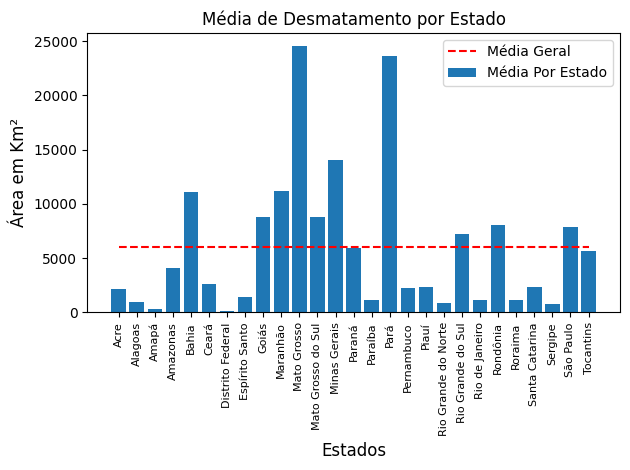

In [22]:
fig, xb = plt.subplots()

xb.bar(state_mean_by_year.index, state_mean_by_year.values)
# formatter = ScalarFormatter(useMathText=True)
# formatter.set_powerlimits((6,6))
# xb.yaxis.set_major_formatter(formatter)


plt.plot(state_mean_by_year.index, [media_geral for _ in range(len(state_mean_by_year.index))], "r--")
plt.title("Média de Desmatamento por Estado")
plt.legend(["Média Geral", "Média Por Estado"])

plt.xlabel("Estados", fontsize=12)
plt.ylabel("Área em Km²", fontsize=12)

plt.xticks([i for i, _ in enumerate(state_mean_by_year.index)], state_mean_by_year.index, rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

Alguns estados estão com uma média bem maior que outros. Isso não necessáriamente significa que há erros. É possível que o tamanho da área florestada de cada estado interfira no resultado.

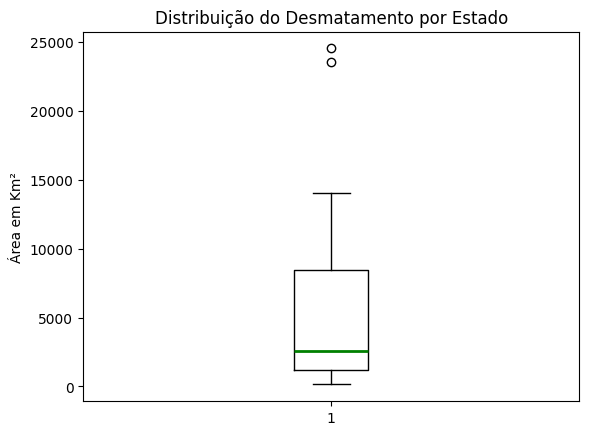

In [23]:
# Box plot para confirmar a distribuição
_, xb = plt.subplots()
xb.boxplot(state_mean_by_year, medianprops={ "color": "green", "linewidth": 2 })
plt.title("Distribuição do Desmatamento por Estado")
xb.set_ylabel("Área em Km²")
plt.show()

O Boxplot mostra uma concentração maior dos dados de desmatamento para cada estado em áreas próximas a 10 mil Km² de desmatamento, com poucos outliers. Entretanto, como visto no gráfico anterior, pode ocorrer de os outliers dificultarem a visualização precisa dos dados menores.

Para uma melhor visualização e uma análise mais precisa, seria interessante relativizar os dados em relação às áreas dos estados para a apresentação da área desmatada para o usuário para o usuário.

In [24]:


deforestation_transposed = states_deforestation_df.T

quartis = deforestation_transposed.quantile([0.25, 0.5, 0.75])

interquartil = quartis.loc[0.75] - quartis.loc[0.25]
outlier_upper_limit = quartis.loc[0.75] + 1.5 * interquartil
outlier_bottom_limit = quartis.loc[0.25] - 1.5 * interquartil

limited_deforestation = states_deforestation_df.copy()

limited_deforestation['Outlier Upper Limit'] = outlier_upper_limit
limited_deforestation['Outlier Bottom Limit'] = outlier_bottom_limit
limited_deforestation

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,2024,Outlier Upper Limit,Outlier Bottom Limit
Acre,0.451175,0.530370,0.530370,0.289842,0.289842,0.123322,0.123322,38819.969467,577.561945,323.498932,...,491.615220,853.336540,1413.847682,1321.567844,1783.982836,2011.703461,926.067689,817.975854,2132.545795,-1278.678884
Amapá,893.691218,184.548858,184.548858,53.167234,53.167234,40.895752,40.895752,5449.858904,218.286077,108.703815,...,74.953647,89.550780,136.779235,48.669407,46.944240,38.304971,45.372146,0.000000,268.943976,-83.495334
Amazonas,1030.728759,122.947200,122.947200,72.412729,72.412729,76.066126,76.066126,64994.072969,1250.555313,712.006296,...,2039.407780,2123.814555,3170.211433,2901.572266,4367.455762,6139.670459,2647.774887,1921.591552,4241.526943,-1405.706092
Maranhão,41660.989390,2388.441606,2388.441606,2926.804586,2926.804586,2453.361032,2453.361032,179955.848882,5102.071534,2994.673517,...,1955.188293,1876.686843,1801.486928,2486.610909,2785.981978,3298.160623,3410.528450,2844.023970,4285.565887,662.202418
Mato Grosso,125598.617422,5881.360868,5881.360868,7279.069343,7279.069343,3118.619853,3118.619853,381657.735374,8912.103549,2914.547277,...,4278.840307,4321.814485,4898.397616,4645.977026,5003.850209,5055.212154,4709.779617,2958.089306,9787.377722,-628.667222
Pará,2986.373606,271.431675,271.431675,243.681183,243.681183,240.851778,240.851778,472842.935761,11403.717091,7213.308186,...,5205.532060,5470.416810,9005.224696,9618.770262,10445.804627,9361.294768,6087.868765,4708.614034,13553.710055,-3354.028263
Rondônia,1357.377661,81.921287,81.921287,159.654433,159.654433,94.068057,94.068057,164893.358624,2213.492250,874.886910,...,2621.101077,2497.902701,2913.160814,2755.844691,3437.910245,3051.945244,1669.250388,672.553142,5276.578277,-2089.861938
Roraima,610.156350,159.582404,159.582404,116.317097,116.317097,196.535780,196.535780,17125.842555,1437.265015,276.374111,...,362.646617,372.179842,1250.018748,815.136061,778.463885,889.258662,844.625101,803.099523,1599.218069,-523.764719
Tocantins,38155.400798,2957.692176,2957.692176,3112.053194,3112.053194,2655.274755,2655.274755,52588.508396,1998.697628,1923.727349,...,1769.918600,1621.929484,1578.890478,1631.407512,1758.366291,2180.224060,2281.275812,2024.427577,4693.886168,64.035523
Alagoas,18736.123580,482.493291,482.493291,482.493291,482.493291,606.301972,606.301972,176.589565,176.589565,116.169450,...,71.168937,39.031750,28.749527,35.957818,24.757035,24.850545,35.243449,NaN,1141.186471,-615.328675


In [25]:
std_frame = pd.DataFrame(columns=["Estado", "Desvio Padrão (Km²)"], data=[])
std_frame["Estado"] = states_deforestation_df.index
std_series = (deforestation_transposed.std()).astype('float64').round(2)
std_frame["Desvio Padrão (Km²)"] = std_series.values
std_frame


,Estado,Desvio Padrão (Km²)
0,Acre,7663.89
1,Amapá,1079.24
2,Amazonas,12769.19
3,Maranhão,36018.86
4,Mato Grosso,78242.61
5,Pará,93655.78
6,Rondônia,32689.90
7,Roraima,3340.30
8,Tocantins,12129.74
9,Alagoas,3790.57


Os devios padrão dos estados através dos anos indicam algumas variações grandes entre os valores presentes. Isso pode ser resultado a ausência de alguns valores no cálculo e deve ser observada com mais cuidado enquanto esses valores não forem tratados.

In [26]:
upper_outlier_matrix = deforestation_transposed > limited_deforestation['Outlier Upper Limit']
upper_outlier_mask = deforestation_transposed.where(upper_outlier_matrix, axis=0)

upper_outliers = upper_outlier_mask.stack()
upper_outliers

limits_list = limited_deforestation.loc[[index[1] for index in upper_outliers.index], 'Outlier Upper Limit']

upper_outlier_data = [(index[0], index[1], pib, limit) for index, pib, limit in zip(upper_outliers.index, upper_outliers.values, limits_list)]
upper_outlier_frame = pd.DataFrame(columns=["Ano", "Estado", "Área desmatada (Km²)", "Upper Limit (Km²)"], data=upper_outlier_data)
upper_outlier_frame["Área desmatada (Km²)"] = round(upper_outlier_frame["Área desmatada (Km²)"], 2)
upper_outlier_frame["Upper Limit (Km²)"] = round(upper_outlier_frame["Upper Limit (Km²)"], 2)
upper_outlier_frame 


,Ano,Estado,Área desmatada (Km²),Upper Limit (Km²)
0,2000,Amapá,893.69,268.94
1,2000,Maranhão,41660.99,4285.57
2,2000,Mato Grosso,125598.62,9787.38
3,2000,Tocantins,38155.40,4693.89
4,2000,Alagoas,18736.12,1141.19
5,2000,Bahia,193931.28,10320.07
6,2000,Ceará,33133.61,3838.08
7,2000,Minas Gerais,285791.40,8465.34
8,2000,Paraíba,18632.68,2252.55
9,2000,Pernambuco,38483.55,2555.22


In [27]:
bottom_outlier_matrix = deforestation_transposed < limited_deforestation['Outlier Bottom Limit']
bottom_outlier_mask = deforestation_transposed.where(bottom_outlier_matrix, axis=0)

bottom_outliers = bottom_outlier_mask.stack()
bottom_outliers

limits_list = limited_deforestation.loc[[index[1] for index in bottom_outliers.index], 'Outlier Bottom Limit']

bottom_outlier_data = [(index[0], index[1], pib, limit) for index, pib, limit in zip(bottom_outliers.index, bottom_outliers.values, limits_list)]
bottom_outlier_frame = pd.DataFrame(columns=["Ano", "Estado", "Área Desmatada (Km²)", "Bottom Limit (Km²)"], data=bottom_outlier_data)
bottom_outlier_frame["Área Desmatada (Km²)"] = round(bottom_outlier_frame["Área Desmatada (Km²)"], 2)
bottom_outlier_frame["Bottom Limit (Km²)"] = round(bottom_outlier_frame["Bottom Limit (Km²)"], 2)
bottom_outlier_frame 

,Ano,Estado,Área Desmatada (Km²),Bottom Limit (Km²)


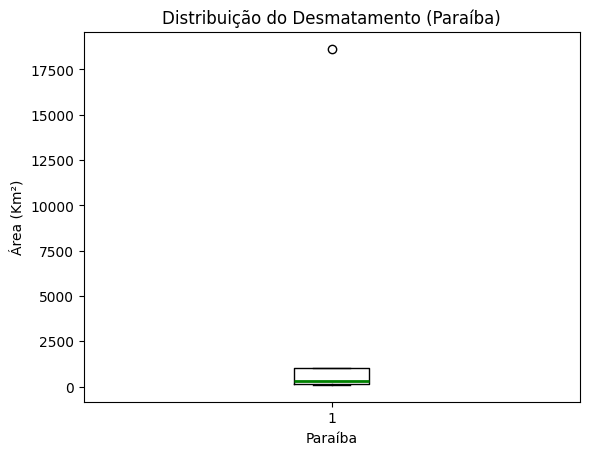

In [28]:
# Gerar pelo menos 1 box plot pra comprovar os outliers (do que tiver menos outliers)
_, xb = plt.subplots()
xb.boxplot(deforestation_transposed['Paraíba'].loc[:2023], medianprops={"color": "g", "linewidth": 2})

xb.set_ylabel("Área (Km²)")
xb.set_xlabel("Paraíba")

plt.title("Distribuição do Desmatamento (Paraíba)")
plt.show()

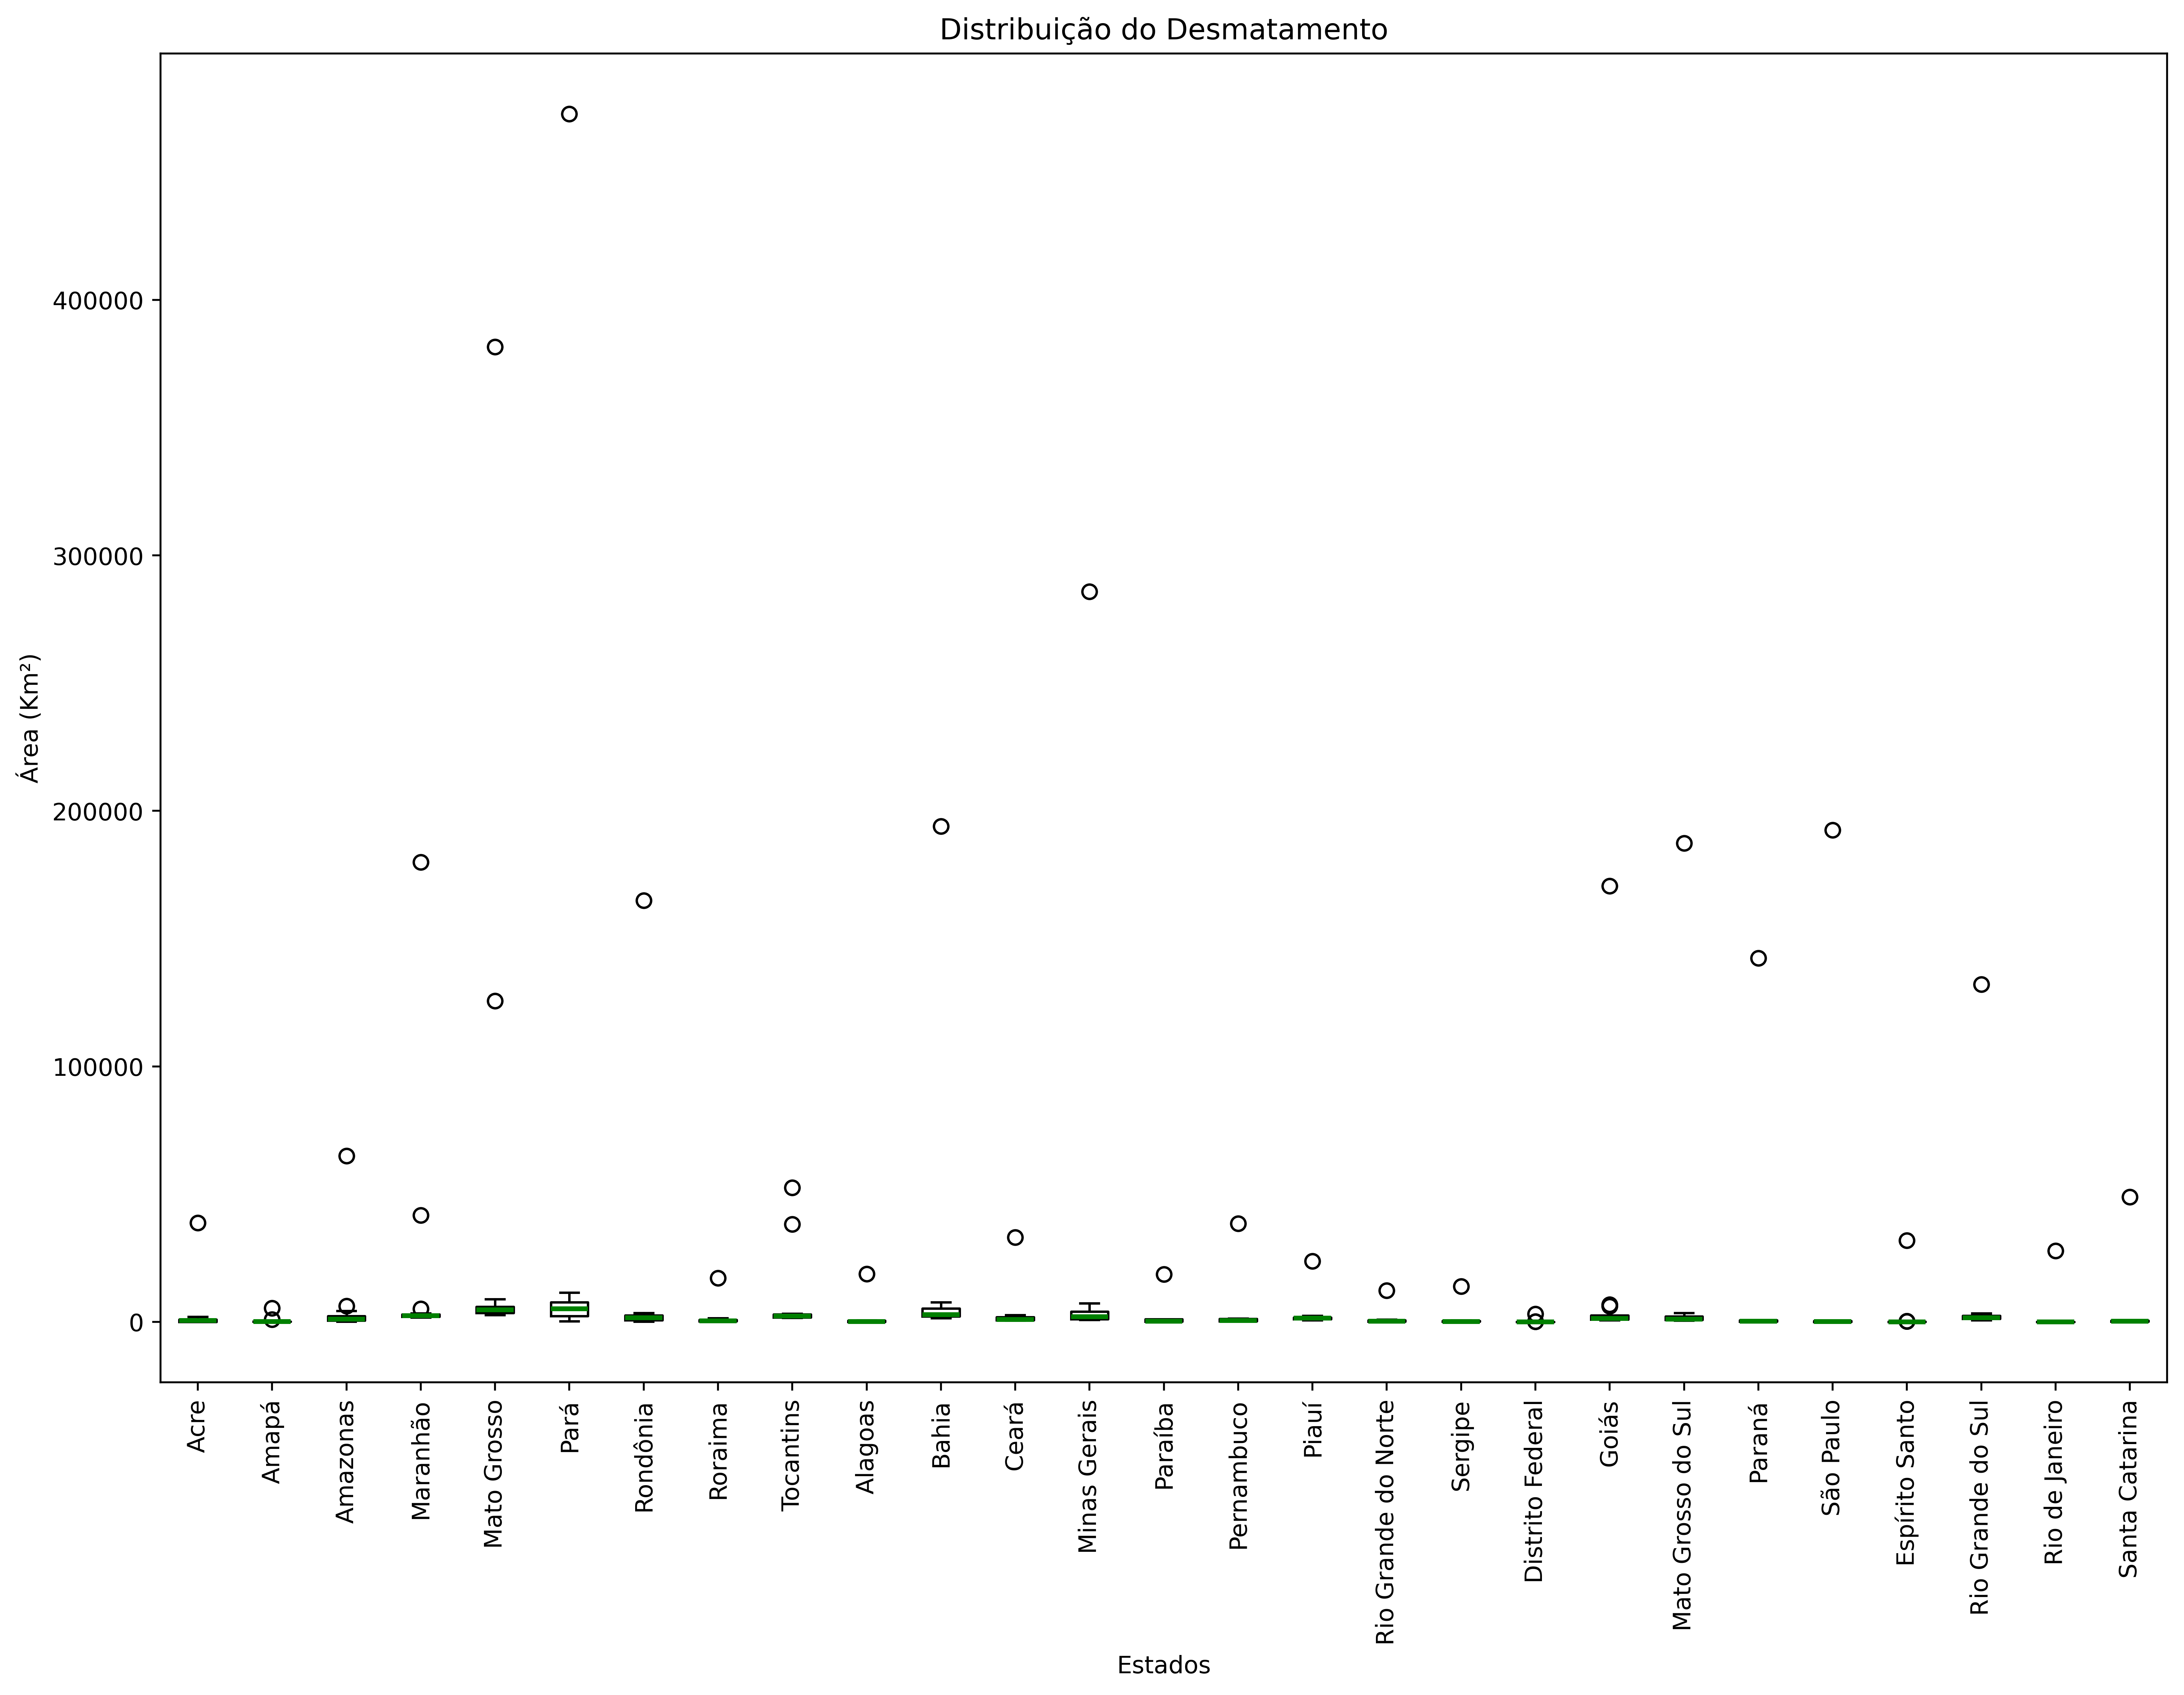

In [29]:
plt.figure(figsize=(15, 10), dpi=500)

plt.boxplot(deforestation_transposed.loc[:2023], medianprops={"color": "g", "linewidth": 2})

# plt.ticklabel_format(axis='y', useMathText=True, scilimits=(6, 6))
plt.ylabel("Área (Km²)")
plt.xlabel("Estados")

plt.xticks([i + 1 for i, _ in enumerate(deforestation_transposed.columns)], deforestation_transposed.columns, rotation=90)


plt.title("Distribuição do Desmatamento")
plt.show()

Nesse caso, a escala dos outliers prejudica a visualização dos outros dados. Isso é um ponto importante a se considerar na apresentação dos dados ao usuário Além disso é importante confirmar se não há erros nos valores dos outiliers mais altos, considerando que a distribuição foi excessivamente desigual.

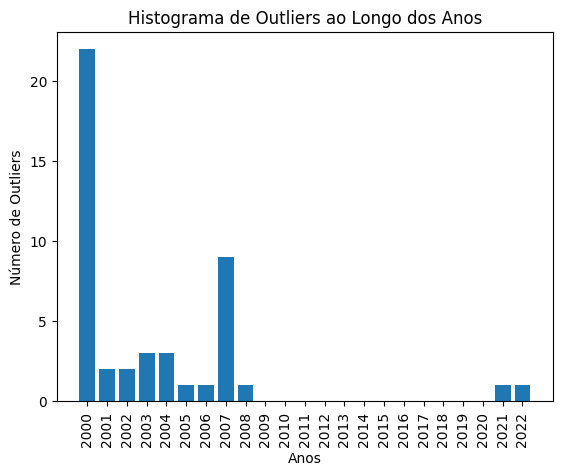

In [30]:
# Plotar gráficos para os anos dos estados específicos e depois verificar se há o mesmo problema com as cidades para confirmar se não foi um erro meu
years_outliers_count = upper_outlier_frame.groupby('Ano').aggregate('count').rename(columns={'Estado': 'Número de Outliers'}).drop(columns=['Área desmatada (Km²)', 'Upper Limit (Km²)'])
plt.bar(x=years_outliers_count.index, height=years_outliers_count['Número de Outliers'], width=0.8)

plt.title("Histograma de Outliers ao Longo dos Anos")
plt.ylabel("Número de Outliers")
plt.xlabel("Anos")

labels = [i for i in range(upper_outlier_frame['Ano'].min(), upper_outlier_frame['Ano'].max() + 1, 1)]
plt.xticks(labels, labels, rotation=90)
plt.show()

Há uma concentração de outliers em anos específicos, especificamente o ano 2000, o que aponta para a ausência de erros de input e transformação. Um erro de transformação geraria problemas mais distribuídos. Erros de input dificilmente se concentrariam tanto em uma sequência tão específica.

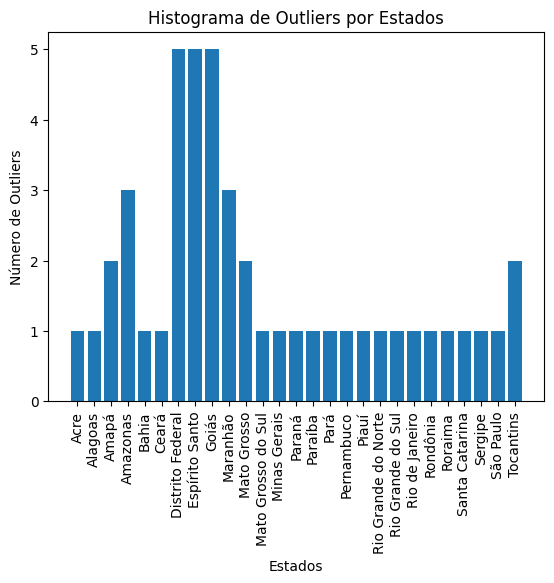

In [31]:
states_outliers_count = upper_outlier_frame.groupby('Estado').aggregate('count').rename(columns={'Ano': 'Número de Outliers'}).drop(columns=['Área desmatada (Km²)', 'Upper Limit (Km²)'])
states_outliers_count
plt.bar(x=states_outliers_count.index, height=states_outliers_count['Número de Outliers'], width=0.8)

plt.title("Histograma de Outliers por Estados")
plt.ylabel("Número de Outliers")
plt.xlabel("Estados")

labels = [i for i, _ in enumerate(states_outliers_count.index)]
plt.xticks(labels, states_outliers_count.index, rotation=90)
plt.show()

Se fosse um erro de transformação, os dados seriam afetados de maneira menos concentrada e dificilmente haveria uma sequência tão grande de erros iguais para a digitação.

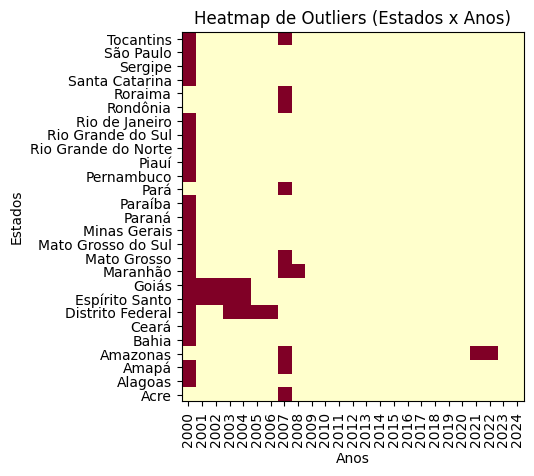

In [32]:
outlier_map_data = upper_outlier_frame.assign(presence=1).drop(columns=['Upper Limit (Km²)', 'Área desmatada (Km²)']).pivot_table(index='Estado', columns='Ano', values='presence')
outlier_map_data = outlier_map_data.reindex(columns=list(range(biomes_df['year'].min(), biomes_df['year'].max() + 1))).fillna(0)
outlier_map_data

plt.imshow(outlier_map_data, cmap='YlOrRd', interpolation='nearest', origin='lower')
plt.xticks([i for i, _ in enumerate(outlier_map_data.columns)], outlier_map_data.columns, rotation=90)
plt.yticks([i for i, _ in enumerate(outlier_map_data.index)], outlier_map_data.index)
plt.title("Heatmap de Outliers (Estados x Anos)")
plt.ylabel("Estados")
plt.xlabel("Anos")
plt.show()

A concentração dos outilers em locais e períodos específicos descarta com certa segurança problemas de transformação. Apesar de ainda ser possível, a constância dos outliers em áreas próximas à concentração reduz bastante a probabilidade de erros de input.

In [139]:
deforestation_cities_history = biomes_df.groupby(by=["municipality", "year"])['areakm'].aggregate(func="sum")
deforestation_cities_history

municipality     year
Abadia de Goiás  2000    113.662581
                 2001      2.017494
                 2002      2.017494
                 2003      1.574948
                 2004      1.574948
                            ...    
Óleo             2020      0.000000
                 2021      0.019522
                 2022      0.000000
                 2023      0.000000
                 2024      0.000000
Name: areakm, Length: 128976, dtype: float64

In [140]:
cities_deforestation_df = pd.DataFrame(columns=biomes_df['year'].unique().sort(), index=biomes_df['municipality'].unique())

for i in deforestation_cities_history.index:
    cities_deforestation_df.loc[i[0], i[1]] = deforestation_cities_history[i]
    # print(i[0], i[1], deforestation_cities_history[i])
cities_deforestation_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Acrelândia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.610734,47.334173,25.876467,...,29.523605,47.611381,11.421810,43.568844,39.775894,25.875112,76.530625,37.005250,24.092100,19.893046
Assis Brasil,0.040788,0.016193,0.016193,0.055235,0.055235,0.012198,0.012198,469.340747,6.839053,3.201398,...,11.878557,5.787899,12.782515,15.851731,42.287778,36.355771,35.310315,16.831099,14.763348,12.302813
Brasiléia,0.000000,0.006337,0.006337,0.000000,0.000000,0.000000,0.000000,2404.279258,25.323167,16.435130,...,44.120728,35.428890,46.237485,42.180162,117.221315,80.242136,122.209932,61.109789,44.959228,38.218962
Bujari,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2233.911873,31.544160,15.242474,...,18.713947,34.574009,15.259796,27.424786,52.109197,35.303012,51.600091,74.420684,31.980536,37.582362
Capixaba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1607.296176,17.659704,7.574252,...,12.170366,33.291867,23.144008,20.531403,55.536597,37.601775,58.772238,63.954599,24.096061,13.455079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unistalda,65.075595,11.086733,11.086733,11.086733,11.086733,2.297192,2.297192,5.052908,5.052908,3.987478,...,4.273850,4.273850,2.746192,3.869673,4.958195,2.803523,4.924293,1.276495,5.774862,NaN
Uruguaiana,2868.284488,122.248571,122.248571,122.248571,122.248571,46.884205,46.884205,36.935858,36.935858,25.133541,...,10.807898,10.807898,14.643273,19.829919,13.456411,9.805815,25.964190,9.278887,7.910691,NaN
Viamão,1042.482544,3.371617,3.371617,3.371617,3.371617,6.162860,6.162860,6.427861,6.427861,1.634612,...,3.354622,3.354622,2.869323,1.927105,4.181052,4.152057,7.771038,2.331474,0.568005,NaN
Vila Nova do Sul,79.850680,12.938896,12.938896,12.938896,12.938896,4.542657,4.542657,11.132423,11.132423,1.871977,...,11.048843,11.048843,9.604739,1.816180,8.119765,4.981792,13.309640,0.416911,3.092720,NaN


In [141]:
deforestation_transposed = cities_deforestation_df.T
deforestation_transposed

,Acrelândia,Assis Brasil,Brasiléia,Bujari,Capixaba,Cruzeiro do Sul,Epitaciolândia,Feijó,Jordão,Manoel Urbano,...,São Sepé,Tapes,Tramandaí,Tupanciretã,Turuçu,Unistalda,Uruguaiana,Viamão,Vila Nova do Sul,Ladário
2000,0.000000,0.040788,0.000000,0.000000,0.000000,384.411133,0.000000,0.101583,0.000000,0.000000,...,1038.627466,540.846954,61.698943,1252.932636,205.408082,65.075595,2868.284488,1042.482544,79.850680,99.066636
2001,0.000000,0.016193,0.006337,0.000000,0.000000,0.143092,0.000000,0.000000,0.000000,0.000000,...,69.084743,4.132865,3.869876,68.547897,0.918523,11.086733,122.248571,3.371617,12.938896,1.962751
2002,0.000000,0.016193,0.006337,0.000000,0.000000,0.143092,0.000000,0.000000,0.000000,0.000000,...,69.084743,4.132865,3.869876,68.547897,0.918523,11.086733,122.248571,3.371617,12.938896,1.962751
2003,0.000000,0.055235,0.000000,0.000000,0.000000,0.150202,0.000000,0.074358,0.017713,0.000000,...,69.084743,4.132865,3.869876,68.547897,0.918523,11.086733,122.248571,3.371617,12.938896,1.962751
2004,0.000000,0.055235,0.000000,0.000000,0.000000,0.150202,0.000000,0.074358,0.017713,0.000000,...,69.084743,4.132865,3.869876,68.547897,0.918523,11.086733,122.248571,3.371617,12.938896,1.962751
2005,0.000000,0.012198,0.000000,0.000000,0.000000,0.154029,0.000000,0.000000,0.015425,0.000000,...,16.659725,11.555886,1.278234,19.252072,0.507794,2.297192,46.884205,6.162860,4.542657,2.616128
2006,0.000000,0.012198,0.000000,0.000000,0.000000,0.154029,0.000000,0.000000,0.015425,0.000000,...,16.659725,11.555886,1.278234,19.252072,0.507794,2.297192,46.884205,6.162860,4.542657,2.616128
2007,2011.610734,469.340747,2404.279258,2233.911873,1607.296176,1834.889458,1567.957817,2466.129923,226.746573,493.887991,...,11.665497,5.401573,1.336869,14.514472,0.316432,5.052908,36.935858,6.427861,11.132423,2.433635
2008,47.334173,6.839053,25.323167,31.544160,17.659704,22.170993,8.674046,54.308986,14.462455,9.807263,...,11.665497,5.401573,1.336869,14.514472,0.316432,5.052908,36.935858,6.427861,11.132423,2.433635
2009,25.876467,3.201398,16.435130,15.242474,7.574252,8.614623,8.381138,39.021902,3.776330,10.652460,...,14.906513,3.831615,0.265582,18.221599,0.022919,3.987478,25.133541,1.634612,1.871977,0.448605


In [142]:
quartis = deforestation_transposed.quantile([0.25, 0.5, 0.75])
quartis

,Acrelândia,Assis Brasil,Brasiléia,Bujari,Capixaba,Cruzeiro do Sul,Epitaciolândia,Feijó,Jordão,Manoel Urbano,...,São Sepé,Tapes,Tramandaí,Tupanciretã,Turuçu,Unistalda,Uruguaiana,Viamão,Vila Nova do Sul,Ladário
0.25,0.000000,0.055235,0.006337,0.000000,0.000000,6.945778,0.000000,0.101583,0.017713,0.000000,...,14.038726,1.742349,0.250863,7.702727,0.022919,3.819288,14.346557,2.399761,4.350671,0.234598
0.50,24.092100,7.547549,34.388517,18.713947,17.659704,21.435132,12.807793,52.750450,9.907661,32.669928,...,14.943114,4.132865,0.739811,14.866847,0.316432,4.599072,25.133541,3.371617,10.326791,0.808993
0.75,37.793545,15.350936,46.237485,34.574009,30.224814,50.545808,18.028447,144.497116,14.462455,60.856865,...,32.293258,4.989479,1.735752,25.610406,0.507794,7.234693,46.884205,6.162860,12.938896,2.080472


In [143]:
interquartil = quartis.loc[0.75] - quartis.loc[0.25]
outlier_upper_limit = quartis.loc[0.75] + 1.5 * interquartil
outlier_bottom_limit = quartis.loc[0.25] - 1.5 * interquartil

limited_deforestation = cities_deforestation_df.copy()

limited_deforestation['Outlier Upper Limit'] = outlier_upper_limit
limited_deforestation['Outlier Bottom Limit'] = outlier_bottom_limit
limited_deforestation

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,2024,Outlier Upper Limit,Outlier Bottom Limit
Acrelândia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.610734,47.334173,25.876467,...,11.421810,43.568844,39.775894,25.875112,76.530625,37.005250,24.092100,19.893046,94.483863,-56.690318
Assis Brasil,0.040788,0.016193,0.016193,0.055235,0.055235,0.012198,0.012198,469.340747,6.839053,3.201398,...,12.782515,15.851731,42.287778,36.355771,35.310315,16.831099,14.763348,12.302813,38.294489,-22.888317
Brasiléia,0.000000,0.006337,0.006337,0.000000,0.000000,0.000000,0.000000,2404.279258,25.323167,16.435130,...,46.237485,42.180162,117.221315,80.242136,122.209932,61.109789,44.959228,38.218962,115.584206,-69.340385
Bujari,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2233.911873,31.544160,15.242474,...,15.259796,27.424786,52.109197,35.303012,51.600091,74.420684,31.980536,37.582362,86.435023,-51.861014
Capixaba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1607.296176,17.659704,7.574252,...,23.144008,20.531403,55.536597,37.601775,58.772238,63.954599,24.096061,13.455079,75.562035,-45.337221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unistalda,65.075595,11.086733,11.086733,11.086733,11.086733,2.297192,2.297192,5.052908,5.052908,3.987478,...,2.746192,3.869673,4.958195,2.803523,4.924293,1.276495,5.774862,NaN,12.357801,-1.303820
Uruguaiana,2868.284488,122.248571,122.248571,122.248571,122.248571,46.884205,46.884205,36.935858,36.935858,25.133541,...,14.643273,19.829919,13.456411,9.805815,25.964190,9.278887,7.910691,NaN,95.690677,-34.459914
Viamão,1042.482544,3.371617,3.371617,3.371617,3.371617,6.162860,6.162860,6.427861,6.427861,1.634612,...,2.869323,1.927105,4.181052,4.152057,7.771038,2.331474,0.568005,NaN,11.807510,-3.244889
Vila Nova do Sul,79.850680,12.938896,12.938896,12.938896,12.938896,4.542657,4.542657,11.132423,11.132423,1.871977,...,9.604739,1.816180,8.119765,4.981792,13.309640,0.416911,3.092720,NaN,25.821234,-8.531667


In [144]:
upper_outlier_matrix = deforestation_transposed > limited_deforestation['Outlier Upper Limit']
upper_outlier_mask = deforestation_transposed.where(upper_outlier_matrix, axis=0)

upper_outliers = upper_outlier_mask.stack()
upper_outliers

limits_list = limited_deforestation.loc[[index[1] for index in upper_outliers.index], 'Outlier Upper Limit']

upper_outlier_data = [(index[0], index[1], pib, limit) for index, pib, limit in zip(upper_outliers.index, upper_outliers.values, limits_list)]
upper_outlier_frame = pd.DataFrame(columns=["Ano", "Cidade", "Área desmatada (Km²)", "Upper Limit (Km²)"], data=upper_outlier_data)
upper_outlier_frame["Área desmatada (Km²)"] = round(upper_outlier_frame["Área desmatada (Km²)"], 2)
upper_outlier_frame["Upper Limit (Km²)"] = round(upper_outlier_frame["Upper Limit (Km²)"], 2)
upper_outlier_frame

,Ano,Cidade,Área desmatada (Km²),Upper Limit (Km²)
0,2000,Cruzeiro do Sul,384.41,115.95
1,2000,Amapá,6.35,5.31
2,2000,Cutias,10.62,10.11
3,2000,Ferreira Gomes,436.17,29.74
4,2000,Itaubal,46.90,18.19
...,...,...,...,...
11679,2024,Bonito de Minas,27.54,25.62
11680,2024,Alto Longá,10.50,9.88
11681,2024,Guadalupe,50.64,22.48
11682,2024,Jerumenha,58.14,48.55


In [145]:
bottom_outlier_matrix = deforestation_transposed < limited_deforestation['Outlier Bottom Limit']
bottom_outlier_mask = deforestation_transposed.where(bottom_outlier_matrix, axis=0)

bottom_outliers = bottom_outlier_mask.stack()
bottom_outliers

limits_list = limited_deforestation.loc[[index[1] for index in bottom_outliers.index], 'Outlier Bottom Limit']

bottom_outlier_data = [(index[0], index[1], pib, limit) for index, pib, limit in zip(bottom_outliers.index, bottom_outliers.values, limits_list)]
bottom_outlier_frame = pd.DataFrame(columns=["Ano", "Cidade", "Área Desmatada (Km²)", "Bottom Limit (Km²)"], data=bottom_outlier_data)
bottom_outlier_frame["Área Desmatada (Km²)"] = round(bottom_outlier_frame["Área Desmatada (Km²)"], 2)
bottom_outlier_frame["Bottom Limit (Km²)"] = round(bottom_outlier_frame["Bottom Limit (Km²)"], 2)
bottom_outlier_frame 

,Ano,Cidade,Área Desmatada (Km²),Bottom Limit (Km²)
0,2009,Guaporé,0.05,0.08
1,2009,Coronel Freitas,0.03,0.04
2,2010,Guaporé,0.05,0.08
3,2010,Coronel Freitas,0.03,0.04
4,2011,Campo Maior,0.00,1.69
5,2011,Padre Paraíso,0.85,1.10
6,2011,Coronel Freitas,0.04,0.04
7,2012,Campo Maior,0.00,1.69
8,2012,Floriano Peixoto,0.00,0.01
9,2013,São João do Soter,8.46,9.81


In [146]:
outlier_map_data = upper_outlier_frame.assign(presence=1).drop(columns=['Upper Limit (Km²)', 'Área desmatada (Km²)']).pivot_table(index='Cidade', columns='Ano', values='presence')
outlier_map_data = outlier_map_data.reindex(columns=list(range(biomes_df['year'].min(), biomes_df['year'].max() + 1))).fillna(0)

outlier_map_data


Ano,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Cidade,,,,,,,,,,,,,,,,,,,,,
Abadia de Goiás,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abadia dos Dourados,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abadiânia,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abaetetuba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abaeté,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Áurea,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ângulo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Érico Cardoso,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


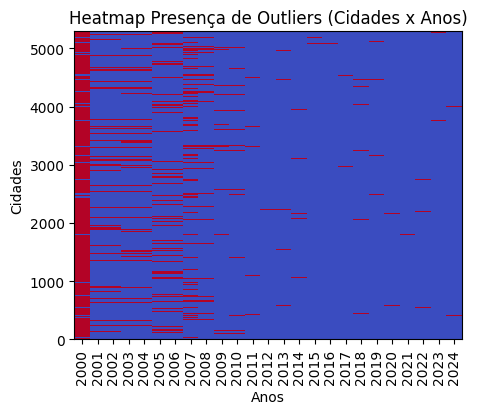

In [147]:
fig, xh = plt.subplots(figsize=(5, 4))
xh.imshow(outlier_map_data, cmap='coolwarm', interpolation='nearest', origin='lower', aspect='auto')
plt.title("Heatmap Presença de Outliers (Cidades x Anos)")
plt.xticks([i for i, _ in enumerate(outlier_map_data.columns)], outlier_map_data.columns, rotation=90)

plt.ylabel("Cidades")
plt.xlabel("Anos")
plt.show()

In [148]:
# Testa um de intensidade tbm ((outlier - limite) nos valores)
outlier_map_data = upper_outlier_frame.drop(columns=['Upper Limit (Km²)']).pivot_table(index='Cidade', columns='Ano', values='Área desmatada (Km²)')
outlier_map_data = outlier_map_data.reindex(columns=list(range(biomes_df['year'].min(), biomes_df['year'].max() + 1))).fillna(0)
outlier_map_data 

outlier_limit_value = upper_outlier_frame.set_index(['Cidade', 'Ano'])

for i in zip(upper_outlier_frame['Cidade'], upper_outlier_frame['Ano']):
    outlier_map_data.loc[i[0], i[1]] = outlier_limit_value.loc[i[0], i[1]]['Upper Limit (Km²)'] / outlier_map_data.loc[i[0], i[1]]\
        if outlier_limit_value.loc[i[0], i[1]]['Upper Limit (Km²)'] > 0 else 1
    
outlier_map_data

Ano,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Cidade,,,,,,,,,,,,,,,,,,,,,
Abadia de Goiás,0.002991,0.168317,0.168317,0.216561,0.216561,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abadia dos Dourados,0.038778,0.355134,0.355134,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abadiânia,0.035613,0.000000,0.000000,0.359729,0.359729,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abaetetuba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004379,0.0,0.920245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abaeté,0.028308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Áurea,0.002836,0.000000,0.000000,0.000000,0.000000,0.690909,0.690909,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ângulo,0.000559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Érico Cardoso,0.036356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


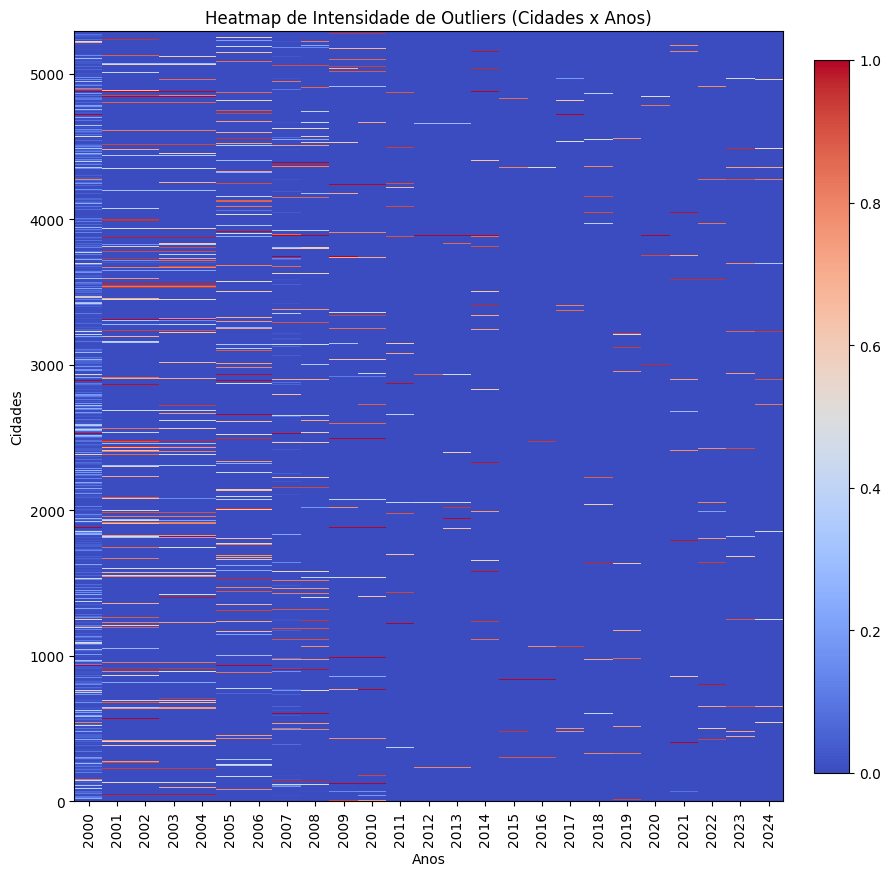

In [150]:
fig, xh = plt.subplots(figsize=(10, 10))

hm = xh.imshow(outlier_map_data, cmap='coolwarm', interpolation='nearest', origin='lower', aspect='auto')

plt.colorbar(hm, ax=xh, fraction=0.046, pad=0.04)

plt.title("Heatmap de Intensidade de Outliers (Cidades x Anos)")
plt.xticks([i for i, _ in enumerate(outlier_map_data.columns)], outlier_map_data.columns, rotation=90)

plt.ylabel("Cidades")
plt.xlabel("Anos")
plt.show()

Para complementar a análise e assegurar que os outliers não são erros, foi analisada a concentração deles entre as cidades, bem como a sua intensidade em relação ao limite imposto para considerar o valor um outlier. O Primeiro gráfico mostra uma clara concentração de outiliers no ano 2000, bem como uma presença mais difusa ao longo dos outros anos. Além disso, o segundo gráfico mostra que os outliers são, em sua maioria, pouco discrepantes de seus limites. Mais uma vez, os dados convergem para uma variação natural e reforçam a ausência dos erros considerados.

Para compreender com certeza os outliers, seria necessária uma análise mais especializada dos eventos de cada ano.